In [2]:
import pandas as pd
import numpy as np
import statistics
from statistics import mean as avg
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, r2_score, precision_score, f1_score, recall_score, roc_auc_score
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from collections import Counter
import joblib
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('recruitment_data.csv')
df.head(7)

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0
5,27,0,3,14,4,31.706659,54,50,50,1,1
6,48,0,2,6,1,17.291229,24,52,64,3,0


In [4]:
df.isna().sum()

Age                    0
Gender                 0
EducationLevel         0
ExperienceYears        0
PreviousCompanies      0
DistanceFromCompany    0
InterviewScore         0
SkillScore             0
PersonalityScore       0
RecruitmentStrategy    0
HiringDecision         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non-null   int64  
 3   ExperienceYears      1500 non-null   int64  
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1500 non-null   int64  
 7   SkillScore           1500 non-null   int64  
 8   PersonalityScore     1500 non-null   int64  
 9   RecruitmentStrategy  1500 non-null   int64  
 10  HiringDecision       1500 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 129.0 KB


In [6]:
df['HiringDecision'].value_counts()

0    1035
1     465
Name: HiringDecision, dtype: int64

In [7]:
df.corr()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
Age,1.000000,0.011286,0.032610,0.024780,-0.032580,-0.021031,-0.025579,-0.008068,0.037727,0.018064,0.001850
Gender,0.011286,1.000000,0.009676,-0.028502,-0.061915,0.003822,-0.020887,0.012333,0.023729,-0.023753,-0.002249
EducationLevel,0.032610,0.009676,1.000000,-0.000951,0.007367,0.020600,0.012807,-0.043367,0.031115,-0.036923,0.236710
ExperienceYears,0.024780,-0.028502,-0.000951,1.000000,0.015784,0.007920,-0.051701,0.006323,0.013891,0.029603,0.122494
PreviousCompanies,-0.032580,-0.061915,0.007367,0.015784,1.000000,0.009187,-0.008387,0.040883,-0.024572,-0.000466,0.044025
DistanceFromCompany,-0.021031,0.003822,0.020600,0.007920,0.009187,1.000000,-0.019594,-0.016891,0.004627,-0.007315,-0.016791
InterviewScore,-0.025579,-0.020887,0.012807,-0.051701,-0.008387,-0.019594,1.000000,-0.004887,-0.027967,0.012004,0.146064
SkillScore,-0.008068,0.012333,-0.043367,0.006323,0.040883,-0.016891,-0.004887,1.000000,-0.004266,-0.031189,0.203668
PersonalityScore,0.037727,0.023729,0.031115,0.013891,-0.024572,0.004627,-0.027967,-0.004266,1.000000,0.004712,0.169177
RecruitmentStrategy,0.018064,-0.023753,-0.036923,0.029603,-0.000466,-0.007315,0.012004,-0.031189,0.004712,1.000000,-0.477552


In [8]:
df.describe()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,35.148667,0.492000,2.188000,7.694000,3.00200,25.505379,50.564000,51.116000,49.387333,1.893333,0.310000
std,9.252728,0.500103,0.862449,4.641414,1.41067,14.567151,28.626215,29.353563,29.353201,0.689642,0.462647
min,20.000000,0.000000,1.000000,0.000000,1.00000,1.031376,0.000000,0.000000,0.000000,1.000000,0.000000
25%,27.000000,0.000000,2.000000,4.000000,2.00000,12.838851,25.000000,25.750000,23.000000,1.000000,0.000000
50%,35.000000,0.000000,2.000000,8.000000,3.00000,25.502239,52.000000,53.000000,49.000000,2.000000,0.000000
75%,43.000000,1.000000,3.000000,12.000000,4.00000,37.737996,75.000000,76.000000,76.000000,2.000000,1.000000
max,50.000000,1.000000,4.000000,15.000000,5.00000,50.992462,100.000000,100.000000,100.000000,3.000000,1.000000


<AxesSubplot:>

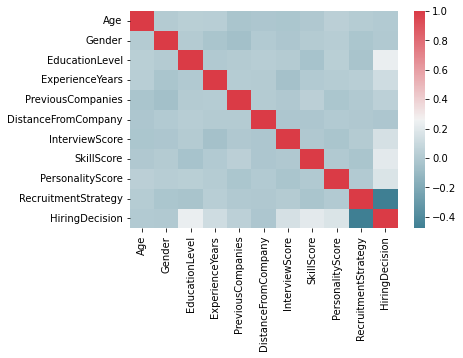

In [9]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df.corr(),cmap=cmap)

In [10]:
hiring_decision = df[df['HiringDecision']==1]

In [11]:
hiring_decision.shape

(465, 11)

In [12]:
hiring_decision.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
5,27,0,3,14,4,31.706659,54,50,50,1,1
8,26,1,3,6,5,28.774864,80,78,51,1,1
12,30,0,3,12,5,5.213218,96,46,78,3,1


In [13]:
not_hiring_decision = df[df['HiringDecision']==0]

# Hiring depends on Education, Experience, Interview score, Skill score, Personality score, Recruitment strategy.
# Not hiring depends on Education, Recruitment strategy.

# LOGIT MODEL

Oversampling techniques

In [14]:
X = df.drop('HiringDecision',axis=1)
y = df['HiringDecision']
scaler = StandardScaler()

In [15]:
model_feature_imp = LogisticRegression()
model_feature_imp.fit(X,y)

LogisticRegression()

In [16]:
importance = model_feature_imp.coef_

In [17]:
importance

array([[-0.01052113, -0.58700968,  0.90077581,  0.10212036,  0.06208   ,
        -0.00875944,  0.01878046,  0.02550987,  0.02057649, -2.56298595]])

In [18]:
model = LogisticRegression()

In [19]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
skf_accuracies = []
p = []
f = []
r = []
roc = []
smt = SMOTE(random_state=42)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)
    X_train_resampled, y_train_resampled = smt.fit_resample(X_train_scaled, y_train)
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    skf_accuracies.append(accuracy)
    p.append(precision)
    f.append(f1)
    r.append(recall)
    roc.append(roc_auc)
print("Without PCA")
print(f'Average stratified cv accuracies: {avg(skf_accuracies)}')
print(f'Average precision: {avg(p)}')
print(f'Average f1: {avg(f)}')
print(f'Average recall: {avg(r)}')
print(f'Average roc_auc: {avg(roc)}')


pca_skf_accuracies = []
pca_p = []
pca_f = []
pca_r = []
pca_roc = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)
    pca = PCA(n_components=5)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    X_train_resampled, y_train_resampled = smt.fit_resample(X_train_pca, y_train)
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_pca)
    y_pred_prob = model.predict_proba(X_test_pca)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    pca_skf_accuracies.append(accuracy)
    pca_p.append(precision)
    pca_f.append(f1)
    pca_r.append(recall)
    pca_roc.append(roc_auc)
print("With PCA")
print(f'Average stratified cv accuracies: {avg(pca_skf_accuracies)}')
print(f'Average precision: {avg(pca_p)}')
print(f'Average f1: {avg(pca_f)}')
print(f'Average recall: {avg(pca_r)}')
print(f'Average roc_auc: {avg(pca_roc)}')

Without PCA
Average stratified cv accuracies: 0.8226666666666667
Average precision: 0.6742392893394431
Average f1: 0.7435232159028937
Average recall: 0.832258064516129
Average roc_auc: 0.891080982806088
With PCA
Average stratified cv accuracies: 0.744
Average precision: 0.569591869479871
Average f1: 0.6405223018216405
Average recall: 0.7354838709677419
Average roc_auc: 0.815032985299465


In [20]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
skf_accuracies = []
p = []
f = []
r = []
roc = []
adasyn = ADASYN(random_state=42)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)
    X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_scaled, y_train)
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    skf_accuracies.append(accuracy)
    p.append(precision)
    f.append(f1)
    r.append(recall)
    roc.append(roc_auc)
print("Without PCA")
print(f'Stratified cv accuracies: {avg(skf_accuracies)}')
print(f'precision: {avg(p)}')
print(f'f1: {avg(f)}')
print(f'recall: {avg(r)}')
print(f'roc_auc: {avg(roc)}')

pca_skf_accuracies = []
pca_p = []
pca_f = []
pca_r = []
pca_roc = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)
    pca = PCA(n_components=5)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_pca, y_train)
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_pca)
    y_pred_prob = model.predict_proba(X_test_pca)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    pca_skf_accuracies.append(accuracy)
    pca_p.append(precision)
    pca_f.append(f1)
    pca_r.append(recall)
    pca_roc.append(roc_auc)
print("With PCA")
print(f'Average stratified cv accuracies: {avg(pca_skf_accuracies)}')
print(f'Average precision: {avg(pca_p)}')
print(f'Average f1: {avg(pca_f)}')
print(f'Average recall: {avg(pca_r)}')
print(f'Average roc_auc: {avg(pca_roc)}')

Without PCA
Stratified cv accuracies: 0.8006666666666666
precision: 0.6316958659901611
f1: 0.7261424216151263
recall: 0.8559139784946237
roc_auc: 0.8890758921614461
With PCA
Average stratified cv accuracies: 0.724
Average precision: 0.5406684630061283
Average f1: 0.631797487186266
Average recall: 0.7634408602150538
Average roc_auc: 0.8134642356241234


In [21]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
skf_accuracies = []
p = []
f = []
r = []
roc = []
smtom = SMOTETomek(random_state=42)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)
    X_train_resampled, y_train_resampled = smtom.fit_resample(X_train_scaled, y_train)
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    skf_accuracies.append(accuracy)
    p.append(precision)
    f.append(f1)
    r.append(recall)
    roc.append(roc_auc)
print("Without PCA")
print(f'Average stratified cv accuracies: {avg(skf_accuracies)}')
print(f'Average precision: {avg(p)}')
print(f'Average f1: {avg(f)}')
print(f'Average recall: {avg(r)}')
print(f'Average roc_auc: {avg(roc)}')

pca_skf_accuracies = []
pca_p = []
pca_f = []
pca_r = []
pca_roc = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)
    pca = PCA(n_components=5)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    X_train_resampled, y_train_resampled = smtom.fit_resample(X_train_pca, y_train)
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_pca)
    y_pred_prob = model.predict_proba(X_test_pca)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    pca_skf_accuracies.append(accuracy)
    pca_p.append(precision)
    pca_f.append(f1)
    pca_r.append(recall)
    pca_roc.append(roc_auc)
print("With PCA")
print(f'Average stratified cv accuracies: {avg(pca_skf_accuracies)}')
print(f'Average precision: {avg(pca_p)}')
print(f'Average f1: {avg(pca_f)}')
print(f'Average recall: {avg(pca_r)}')
print(f'Average roc_auc: {avg(pca_roc)}')

Without PCA
Average stratified cv accuracies: 0.8233333333333334
Average precision: 0.6763604901133305
Average f1: 0.7437008421156821
Average recall: 0.8301075268817204
Average roc_auc: 0.891330320502831
With PCA
Average stratified cv accuracies: 0.7433333333333333
Average precision: 0.5705500995294182
Average f1: 0.6366765356645349
Average recall: 0.7247311827956989
Average roc_auc: 0.8152407667134175


In [22]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
skf_accuracies = []
p = []
f = []
r = []
roc = []
smeen = SMOTEENN(random_state=42)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)
    X_train_resampled, y_train_resampled = smeen.fit_resample(X_train_scaled, y_train)
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    skf_accuracies.append(accuracy)
    p.append(precision)
    f.append(f1)
    r.append(recall)
    roc.append(roc_auc)
print("With PCA")
print(f'Average stratified cv accuracies: {avg(skf_accuracies)}')
print(f'Average precision: {avg(p)}')
print(f'Average f1: {avg(f)}')
print(f'Average recall: {avg(r)}')
print(f'Average roc_auc: {avg(roc)}')

pca_skf_accuracies = []
pca_p = []
pca_f = []
pca_r = []
pca_roc = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)
    pca = PCA(n_components=5)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    X_train_resampled, y_train_resampled = smeen.fit_resample(X_train_pca, y_train)
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_pca)
    y_pred_prob = model.predict_proba(X_test_pca)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    pca_skf_accuracies.append(accuracy)
    pca_p.append(precision)
    pca_f.append(f1)
    pca_r.append(recall)
    pca_roc.append(roc_auc)
print("With PCA")
print(f'Average stratified cv accuracies: {avg(pca_skf_accuracies)}')
print(f'Average precision: {avg(pca_p)}')
print(f'Average f1: {avg(pca_f)}')
print(f'Average recall: {avg(pca_r)}')
print(f'Average roc_auc: {avg(pca_roc)}')

With PCA
Average stratified cv accuracies: 0.7973333333333333
Average precision: 0.632287638548412
Average f1: 0.719340941756279
Average recall: 0.8387096774193549
Average roc_auc: 0.8893875642823749
With PCA
Average stratified cv accuracies: 0.696
Average precision: 0.511664581883091
Average f1: 0.6166001161178265
Average recall: 0.7870967741935484
Average roc_auc: 0.8139317438055166


TRAIN-TEST SPLIT

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

Undersampling techniques

In [24]:
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_scaled, y_train)

In [25]:
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[:,1]
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'f1: {f1}')
print(f'recall: {recall}')
print(f'roc_auc: {roc_auc}')

accuracy: 0.8033333333333333
precision: 0.6048387096774194
f1: 0.7177033492822966
recall: 0.8823529411764706
roc_auc: 0.9014500683994529


Finding good n_components values

n_components: 10


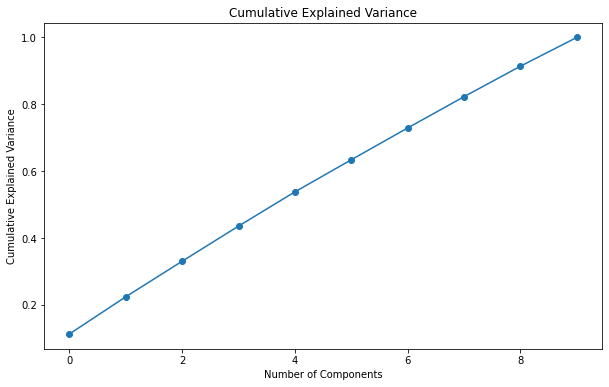

In [26]:
pca = PCA()
pca.fit(X_train_scaled)
cum_var = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(cum_var, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
n_components = np.argmax(cum_var >= 0.95) + 1
print(f'n_components: {n_components}')

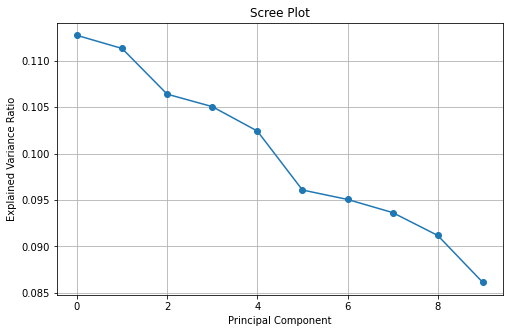

In [27]:
# Fit PCA on the scaled data
pca = PCA()
pca.fit(X_train_scaled)

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [28]:
eigen_values = pca.explained_variance_
n_components = np.sum(eigen_values >= 1)
print(f'n_components: {n_components}')

n_components: 5


In [29]:
model_logit = LogisticRegression()

In [30]:
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [31]:
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_pca, y_train)

In [32]:
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [33]:
y_pred = model.predict(X_test_pca)
y_pred_prob = model.predict_proba(X_test_pca)[:,1]

In [34]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(accuracy)
print(precision)
print(f1)
print(recall)
print(roc_auc)

0.7433333333333333
0.5307692307692308
0.641860465116279
0.8117647058823529
0.8339808481532148


# RANDOM FOREST

Accuracy: 0.93
Precision: 0.8902439024390244
F1 Score: 0.874251497005988
Recall: 0.8588235294117647
ROC AUC: 0.9254172366621067


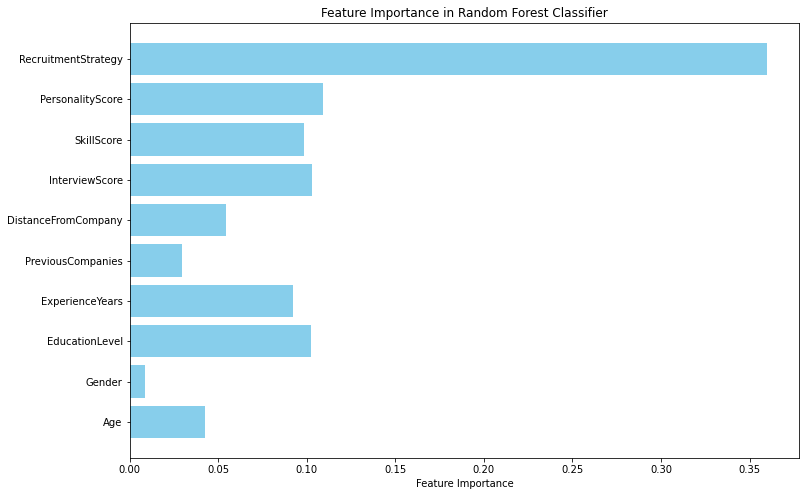

In [35]:
rfc_model = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)
smt = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smt.fit_resample(X_train_scaled, y_train)
rfc_model.fit(X_train_resampled, y_train_resampled)
y_pred = rfc_model.predict(X_test_scaled)
y_pred_prob = rfc_model.predict_proba(X_test_scaled)[:,1]
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')
print(f'Recall: {recall}')
print(f'ROC AUC: {roc_auc}')

feature_importances = rfc_model.feature_importances_
features = X.columns

plt.figure(figsize=(12, 8))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Classifier')
plt.show()

Accuracy: 0.9266666666666666
Precision: 0.8620689655172413
F1 Score: 0.872093023255814
Recall: 0.8823529411764706
ROC AUC: 0.9277154582763337


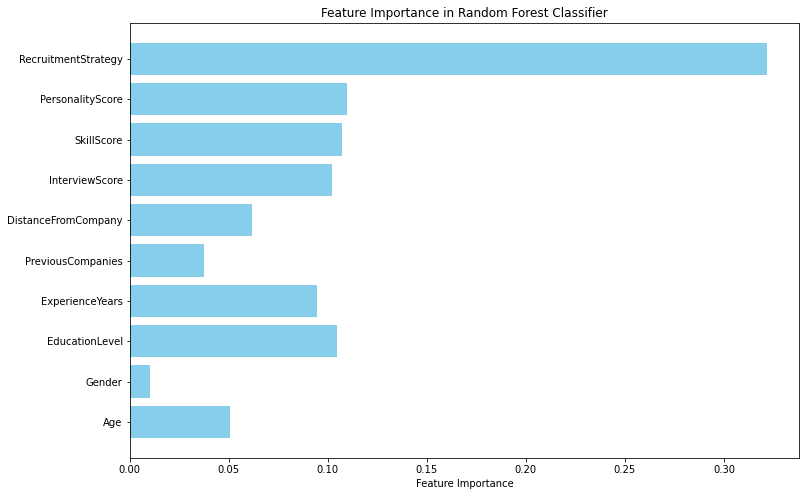

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_scaled, y_train)
rfc_model.fit(X_train_resampled, y_train_resampled)
y_pred = rfc_model.predict(X_test_scaled)
y_pred_prob = rfc_model.predict_proba(X_test_scaled)[:,1]
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')
print(f'Recall: {recall}')
print(f'ROC AUC: {roc_auc}')

feature_importances = rfc_model.feature_importances_
features = X.columns

plt.figure(figsize=(12, 8))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Classifier')
plt.show()

Accuracy: 0.9266666666666666
Precision: 0.8705882352941177
F1 Score: 0.8705882352941176
Recall: 0.8705882352941177
ROC AUC: 0.9288098495212038


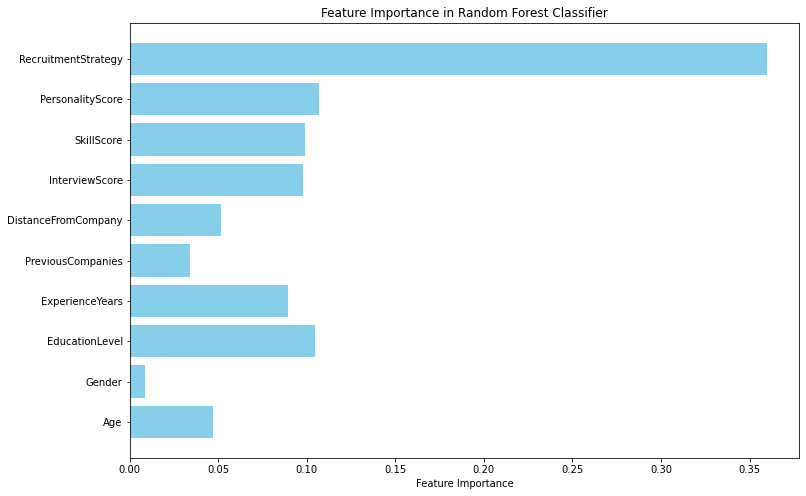

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)
smote = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
rfc_model.fit(X_train_resampled, y_train_resampled)
y_pred = rfc_model.predict(X_test_scaled)
y_pred_prob = rfc_model.predict_proba(X_test_scaled)[:,1]
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')
print(f'Recall: {recall}')
print(f'ROC AUC: {roc_auc}')

feature_importances = rfc_model.feature_importances_
features = X.columns

plt.figure(figsize=(12, 8))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Classifier')
plt.show()

Accuracy: 0.88
Precision: 0.7425742574257426
F1 Score: 0.8064516129032258
Recall: 0.8823529411764706
ROC AUC: 0.9252530779753763


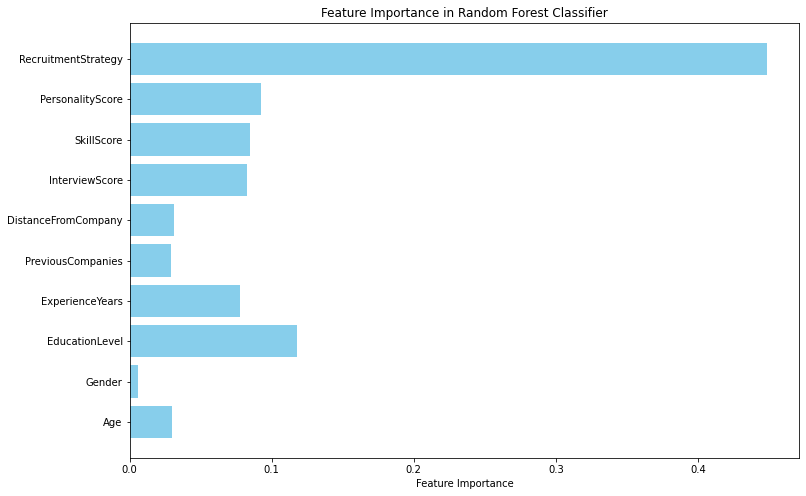

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)
smeen = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smeen.fit_resample(X_train_scaled, y_train)
rfc_model.fit(X_train_resampled, y_train_resampled)
y_pred = rfc_model.predict(X_test_scaled)
y_pred_prob = rfc_model.predict_proba(X_test_scaled)[:,1]
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')
print(f'Recall: {recall}')
print(f'ROC AUC: {roc_auc}')

feature_importances = rfc_model.feature_importances_
features = X.columns

plt.figure(figsize=(12, 8))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Classifier')
plt.show()

Undersampling for Random Forest

Accuracy: 0.8933333333333333
Precision: 0.7676767676767676
F1 Score: 0.826086956521739
Recall: 0.8941176470588236
ROC AUC: 0.9332421340629274


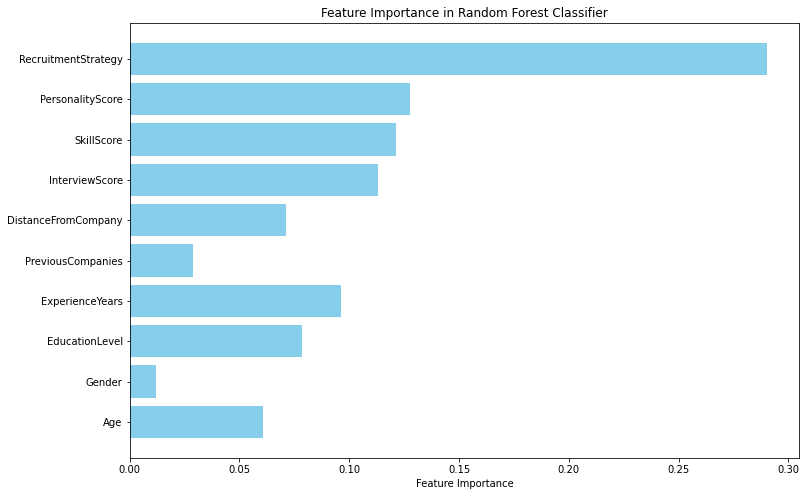

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_scaled, y_train)

rfc_model.fit(X_train_resampled, y_train_resampled)

y_pred = rfc_model.predict(X_test_scaled)
y_pred_prob = rfc_model.predict_proba(X_test_scaled)[:,1]
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')
print(f'Recall: {recall}')
print(f'ROC AUC: {roc_auc}')

feature_importances = rfc_model.feature_importances_
features = X.columns

plt.figure(figsize=(12, 8))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Classifier')
plt.show()

# SVM

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

smt = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smt.fit_resample(X_train_scaled, y_train)

svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_resampled, y_train_resampled)

y_pred = svm_model.predict(X_test_scaled)
y_pred_prob = svm_model.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')
print(f'Recall: {recall}')
print(f'ROC AUC: {roc_auc}')

Accuracy: 0.8633333333333333
Precision: 0.782608695652174
F1 Score: 0.7783783783783783
Recall: 0.7741935483870968
ROC AUC: 0.9101864838190223


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_scaled, y_train)

svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_resampled, y_train_resampled)

y_pred = svm_model.predict(X_test_scaled)
y_pred_prob = svm_model.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')
print(f'Recall: {recall}')
print(f'ROC AUC: {roc_auc}')

Accuracy: 0.8666666666666667
Precision: 0.7523809523809524
F1 Score: 0.7979797979797979
Recall: 0.8494623655913979
ROC AUC: 0.9093034128097242


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

smote = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_resampled, y_train_resampled)

y_pred = svm_model.predict(X_test_scaled)
y_pred_prob = svm_model.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')
print(f'Recall: {recall}')
print(f'ROC AUC: {roc_auc}')

Accuracy: 0.8666666666666667
Precision: 0.7912087912087912
F1 Score: 0.7826086956521738
Recall: 0.7741935483870968
ROC AUC: 0.910030647758558


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

smeen = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smeen.fit_resample(X_train_scaled, y_train)

svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_resampled, y_train_resampled)

y_pred = svm_model.predict(X_test_scaled)
y_pred_prob = svm_model.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')
print(f'Recall: {recall}')
print(f'ROC AUC: {roc_auc}')

Accuracy: 0.8466666666666667
Precision: 0.7079646017699115
F1 Score: 0.7766990291262136
Recall: 0.8602150537634409
ROC AUC: 0.9060308555399719


### Undersampling

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_scaled, y_train)

svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_resampled, y_train_resampled)

y_pred = svm_model.predict(X_test_scaled)
y_pred_prob = svm_model.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')
print(f'Recall: {recall}')
print(f'ROC AUC: {roc_auc}')

Accuracy: 0.8466666666666667
Precision: 0.7238095238095238
F1 Score: 0.7676767676767677
Recall: 0.8172043010752689
ROC AUC: 0.9027582982702197


# We will choose Random Forest Classifier SMOTE

Accuracy: 0.9333333333333333
Precision: 0.9012345679012346
F1 Score: 0.8795180722891566
Recall: 0.8588235294117647
ROC AUC: 0.9270041039671683


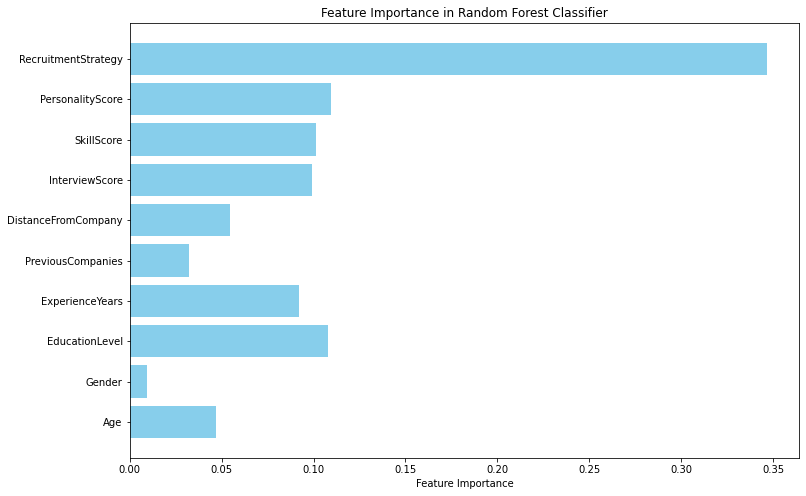

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

rfc_model.fit(X_train_resampled, y_train_resampled)

y_pred = rfc_model.predict(X_test_scaled)
y_pred_prob = rfc_model.predict_proba(X_test_scaled)[:,1]
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')
print(f'Recall: {recall}')
print(f'ROC AUC: {roc_auc}')

feature_importances = rfc_model.feature_importances_
features = X.columns

plt.figure(figsize=(12, 8))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Classifier')
plt.show()

In [50]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.columns)  # Assuming all columns in X are numeric
    ]
)

pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', rfc_model)
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Save the pipeline
joblib.dump(pipeline, 'model_pipeline.joblib')

# Predict and evaluate as before
y_pred = pipeline.predict(X_test)
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')
print(f'Recall: {recall}')
print(f'ROC AUC: {roc_auc}')


Accuracy: 0.94
Precision: 0.9036144578313253
F1 Score: 0.8928571428571428
Recall: 0.8823529411764706
ROC AUC: 0.926046511627907
